In [1]:
# import cv2
from os import walk
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import wandb
# import os
import azureml.core
from azureml.core import Workspace, Dataset, Experiment, ScriptRunConfig, Environment
# from azureml.data.datapath import DataPath
from azureml.core.authentication import InteractiveLoginAuthentication
from azureml.core.runconfig import DockerConfiguration
from azureml.core.conda_dependencies import CondaDependencies

In [2]:
# wandb.login()

In [3]:
# Wandb_key = 73a6229fd23f300e506915af1156d39cd5a21a4e

In [12]:
def env_packages():
    conda_dep = CondaDependencies()
    conda_dep.add_channel('pytorch')
    conda_dep.add_channel('defaults')
    
    conda_dep.add_conda_package('python=3.8')
    conda_dep.add_conda_package('pip')
    conda_dep.add_conda_package('python-spams')
    
    conda_dep.add_pip_package('wandb>=0.10.30')
    conda_dep.add_pip_package('opencv-python-headless>=4.4.0.46')
    conda_dep.add_pip_package('numpy')
    conda_dep.add_pip_package('matplotlib>=3.3.3')
    conda_dep.add_pip_package('torch>=1.8.1')
    conda_dep.add_pip_package('torch-summary')
    conda_dep.add_pip_package('torchvision==0.5.0')
    conda_dep.add_pip_package('pandas~=1.4.1')
    conda_dep.add_pip_package('azureml-core~=1.39.0')
    conda_dep.add_pip_package('torchvision')
    conda_dep.add_pip_package('tqdm')
    conda_dep.add_pip_package('segmentation_models_pytorch')
    
    return conda_dep

In [13]:
ws = Workspace.from_config('config.json', auth=InteractiveLoginAuthentication())
print(ws.name, ws.location, ws.resource_group, sep='\t')

a0047stufiitml01	westeurope	a0047-STUFIIT-ML01


In [14]:
experiment = Experiment(workspace=ws, name='BCSS-Slimak')

In [15]:
dataset = Dataset.get_by_name(workspace=ws, name='BCSS-Dataset')

In [34]:
dc = DockerConfiguration(use_docker=True)

config = ScriptRunConfig(source_directory='../',
                         script='./scripts/main.py',
                         arguments=['--wandb', "73a6229fd23f300e506915af1156d39cd5a21a4e",
#                          arguments=['--wandb', "584287ef3bc4e3311465171c04c9525858e97893",
                                    '--data_path', dataset.as_mount()],
                         compute_target='Slimak-P100',
                         docker_runtime_config=dc)

In [35]:
# azureml.core.runconfig.DockerConfiguration(use_docker=True)
env = Environment('slimak-env')
env.python.conda_dependencies = env_packages()
env.save_to_directory('../', overwrite=True)
env.register(workspace=ws)

# env = Environment.get(workspace=ws, name='Torch1.8-Opencv-wandb')

{
    "databricks": {
        "eggLibraries": [],
        "jarLibraries": [],
        "mavenLibraries": [],
        "pypiLibraries": [],
        "rcranLibraries": []
    },
    "docker": {
        "arguments": [],
        "baseDockerfile": null,
        "baseImage": "mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04:20220208.v1",
        "baseImageRegistry": {
            "address": null,
            "password": null,
            "registryIdentity": null,
            "username": null
        },
        "enabled": false,
        "platform": {
            "architecture": "amd64",
            "os": "Linux"
        },
        "sharedVolumes": true,
        "shmSize": null
    },
    "environmentVariables": {
        "EXAMPLE_ENV_VAR": "EXAMPLE_VALUE"
    },
    "inferencingStackVersion": null,
    "name": "slimak-env",
    "python": {
        "baseCondaEnvironment": null,
        "condaDependencies": {
            "channels": [
                "anaconda",
                "conda-forge",
  

In [36]:
config.run_config.environment = env

In [37]:
run = experiment.submit(config)

In [38]:
aml_url = run.get_portal_url()
print(aml_url)

https://ml.azure.com/runs/BCSS-Slimak_1649146980_864fd4e4?wsid=/subscriptions/bc82dccd-f19d-42cb-9ce3-0d5df33ef086/resourcegroups/a0047-STUFIIT-ML01/workspaces/a0047stufiitml01&tid=5dbf1add-202a-4b8d-815b-bf0fb024e033


In [21]:
arr = []

In [22]:
arr.append({
            "path": "/feijf/erg",
            "mean": 12,
            "stds": 10
        })
arr.append({
            "path": "/feergwergerg",
            "mean": 14,
            "stds": 19
        })

In [23]:
arr

[{'path': '/feijf/erg', 'mean': 12, 'stds': 10},
 {'path': '/feergwergerg', 'mean': 14, 'stds': 19}]

In [24]:
sorted_by_mean = sorted(arr, key=lambda d: d['mean'])

In [27]:
mid = sorted_by_mean[-1]["mean"]/2
mid

7.0

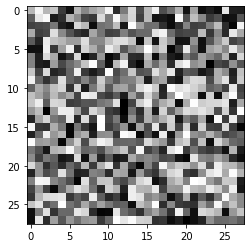

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

img = []
for i in range(28):
    tmp_arr = []
    for j in range(28):
        rand_pix = random.randint(0, 255)
        tmp_arr.append(rand_pix)
    img.append(tmp_arr)
img = np.array(img)

fname = 'mask.png'
arr = np.asarray(img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [41]:
import torchvision.transforms as transforms

transforms = transforms.ToTensor()

In [42]:
transforms(img)

tensor([[[182, 245, 182, 198,  59,  18, 184, 136, 166, 186, 245,  45, 123, 217,
           75, 186, 241,  79, 113, 177,  18, 164,  15,  31,  13, 231,  32,  30],
         [ 94, 229, 249,  26,  46, 179, 141,  68,  57, 218, 121, 247, 163, 214,
           64, 186,  20,  24,  13, 246,  78, 190, 136,  58,  79,  14,  18,  87],
         [ 65,  72,  77, 120,  32,  16, 215, 185,  12, 114, 121, 190,  24, 254,
          159, 110, 112,  48,  11,  47, 130,  63,  69, 126, 188,  44,   5, 244],
         [171,  64,  74, 222, 137,  83,  51,  37, 166, 116,  64,  69, 127,  83,
          106, 106, 226, 243, 110,  65,  72,  68, 187,  55, 136,  42, 232, 170],
         [ 92,  38, 237, 193, 182, 157, 157, 221, 136, 137, 190, 221, 224, 196,
            9, 197,  19, 202, 149,  20,  21, 146,  16,  85, 150, 202,  67,  87],
         [ 16,  17, 241,  55, 159, 239,  44, 212, 173, 121, 237, 202,  86, 137,
          160, 255, 173, 207,   6,  60, 234, 117,  17, 160, 180, 136, 232, 160],
         [129,  33, 219, 171,  17,

In [17]:
import numpy
unique = numpy.unique(img.reshape(-1, img.shape[2]), axis=0)

In [18]:
len(unique)

784

In [1]:
image_dir_path = r'..\\BCSS\\CrowdsourcingDataset-Amgadetal2019\\BCSS-dataset\\train\\images'
mask_dir_path = r'..\\BCSS\\CrowdsourcingDataset-Amgadetal2019\\BCSS-dataset\\train\\masks'
    
images_tiles_dir_train = r'E:\\Desktop\\Bakalarka\\BCSS\\CrowdsourcingDataset-Amgadetal2019\\BCSS-dataset\\debug\\'
images_tiles_dir_test = r'E:\\Desktop\\Bakalarka\\BCSS\\CrowdsourcingDataset-Amgadetal2019\\BCSS-dataset\\debug\\'
masks_tiles_dir_train = r'E:\\Desktop\\Bakalarka\\BCSS\\CrowdsourcingDataset-Amgadetal2019\\BCSS-dataset\\debug\\'
masks_tiles_dir_test = r'E:\\Desktop\\Bakalarka\\BCSS\\CrowdsourcingDataset-Amgadetal2019\\BCSS-dataset\\debug\\'

test_institutes = ['OL', 'LL', 'C8', 'BH', 'AR', 'A7', 'A1']
tile_size = 128 # 128px
shift_size = tile_size - 20 # 108px

testing_dir = r'..\BCSS\CrowdsourcingDataset-Amgadetal2019\testing'

In [2]:
images_names = []
for (dirpath, dirname, filename) in walk(image_dir_path):
    images_names.extend(filename)
    break

NameError: name 'walk' is not defined

In [ ]:
images_names = 'TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0.2500.png'

**Function for path generation**

In [24]:
def get_path(image_name, row, column, identifier):
    path = ""
    postfix = '[' + str(int(row/shift_size)) + ',' + str(int(column/shift_size)) + ']' + ".png"
    institute = image_name.split('-')[1]
    if institute in test_institutes:
        # Test group
        if identifier == 'M' or identifier == 'm':
            # Mask
            path = masks_tiles_dir_test + '\\' + image_name[0:-4] + postfix
        elif identifier == 'I' or identifier == 'i':
            # Image
            path = images_tiles_dir_test + '\\' + image_name[0:-4] + postfix
        else:
            return 0
    else:
        # Train group
        if identifier == 'M' or identifier == 'm':
            # Mask
            path = masks_tiles_dir_train + '\\' + image_name[0:-4] + postfix
        elif identifier == 'I' or identifier == 'i':
            # Image
            path = images_tiles_dir_train + '\\' + image_name[0:-4] + postfix
        else:
            return 0
    return path

Split images into tiles and save them to files

In [25]:
for number, image_name in tqdm(enumerate(images_names)):
    # Load image/mask from file
    image = cv2.imread(image_dir_path + "\\" + image_name, cv2.IMREAD_COLOR)
    mask = cv2.imread(mask_dir_path + "\\" + image_name, cv2.IMREAD_GRAYSCALE)
    
    # Get image/mask parameters
    image_height, image_width, image_channels = image.shape
    mask_height, mask_width = mask.shape
    
    print(f"IMAGE - height: {image_height}, width: {image_width}, channels: {image_channels}")
    print(f"MASK - height: {mask_height}, width: {mask_width}")
    
    row_index = 0
    column_index = 0
    
    # Cycle by shift and cut images untill it is possible
    while row_index + tile_size <= image_height:
        column_index = 0 
        while column_index + tile_size <= image_width:
            image_tile = image[row_index : row_index + tile_size, column_index : column_index + tile_size]
            mask_tile = mask[row_index : row_index + tile_size, column_index : column_index + tile_size]
            
            cv2.imwrite(get_path(image_name, row_index, column_index, 'I'), image_tile)
            cv2.imwrite(get_path(image_name, row_index, column_index, 'M'), mask_tile)
            
            column_index += shift_size   
        row_index += shift_size
    
    # Add tiles from last column (image width - tile size)
    row_index_tmp = 0 
    last_column = image_width - tile_size
    while row_index_tmp + tile_size <= image_height:
        image_tile = image[row_index_tmp : row_index_tmp + tile_size, last_column : last_column + tile_size]
        mask_tile = mask[row_index_tmp : row_index_tmp + tile_size, last_column : last_column + tile_size]
        
        cv2.imwrite(get_path(image_name, row_index_tmp, column_index, "I"), image_tile)
        cv2.imwrite(get_path(image_name, row_index_tmp, column_index, "M"), mask_tile)
        
        row_index_tmp += shift_size
    
    # Adding tiles from last row (image height - tile size )
    column_index_tmp = 0
    last_row = image_height - tile_size
    while column_index_tmp + tile_size <= image_width:
        image_tile = image[last_row : last_row + tile_size, column_index_tmp : column_index_tmp + tile_size]
        mask_tile = mask[last_row : last_row + tile_size, column_index_tmp : column_index_tmp + tile_size]
    
        cv2.imwrite(get_path(image_name, row_index, column_index_tmp, 'I'), image_tile)
        cv2.imwrite(get_path(image_name, row_index, column_index_tmp, 'M'), mask_tile)
        
        column_index_tmp += shift_size
           
    # Adding one last tile from last column and row
    image_tile = image[last_row : last_row + tile_size, last_column : last_column + tile_size]
    mask_tile = mask[last_row : last_row + tile_size, last_column : last_column + tile_size]
    
    cv2.imwrite(get_path(image_name, row_index, column_index, 'I'), image_tile)
    cv2.imwrite(get_path(image_name, row_index, column_index, 'M'), mask_tile)
    
    print("Image nr.: " + str(number) + ", produced: " + str( int(row_index/shift_size) * int(column_index/shift_size) ) + " tiles")


0it [00:00, ?it/s]

IMAGE - height: 2467, width: 3394, channels: 3
MASK - height: 2467, width: 3394



1it [00:01,  1.79s/it]

Image nr.: 0, produced: 682 tiles
IMAGE - height: 3426, width: 4838, channels: 3
MASK - height: 3426, width: 4838



2it [00:05,  2.68s/it]

Image nr.: 1, produced: 1364 tiles
IMAGE - height: 2919, width: 3794, channels: 3
MASK - height: 2919, width: 3794



3it [00:08,  2.86s/it]

Image nr.: 2, produced: 884 tiles
IMAGE - height: 1813, width: 1816, channels: 3
MASK - height: 1813, width: 1816



4it [00:09,  2.15s/it]

Image nr.: 3, produced: 256 tiles
IMAGE - height: 3169, width: 6275, channels: 3
MASK - height: 3169, width: 6275



5it [00:15,  3.54s/it]

Image nr.: 4, produced: 1653 tiles
IMAGE - height: 3230, width: 4207, channels: 3
MASK - height: 3230, width: 4207



6it [00:21,  4.43s/it]

Image nr.: 5, produced: 1102 tiles
IMAGE - height: 6813, width: 7360, channels: 3
MASK - height: 6813, width: 7360



7it [00:40,  9.37s/it]

Image nr.: 6, produced: 4154 tiles
IMAGE - height: 2418, width: 3391, channels: 3
MASK - height: 2418, width: 3391



8it [00:44,  7.58s/it]

Image nr.: 7, produced: 682 tiles
IMAGE - height: 4626, width: 5398, channels: 3
MASK - height: 4626, width: 5398



9it [00:55,  8.47s/it]

Image nr.: 8, produced: 2058 tiles
IMAGE - height: 4196, width: 2756, channels: 3
MASK - height: 4196, width: 2756



10it [00:59,  7.29s/it]

Image nr.: 9, produced: 950 tiles
IMAGE - height: 2496, width: 4035, channels: 3
MASK - height: 2496, width: 4035



11it [01:06,  6.98s/it]

Image nr.: 10, produced: 814 tiles
IMAGE - height: 3164, width: 5132, channels: 3
MASK - height: 3164, width: 5132



12it [01:11,  6.52s/it]

Image nr.: 11, produced: 1363 tiles
IMAGE - height: 3836, width: 3793, channels: 3
MASK - height: 3836, width: 3793



13it [01:20,  7.25s/it]

Image nr.: 12, produced: 1190 tiles
IMAGE - height: 4071, width: 6479, channels: 3
MASK - height: 4071, width: 6479



14it [01:32,  8.58s/it]

Image nr.: 13, produced: 2183 tiles
IMAGE - height: 1991, width: 3626, channels: 3
MASK - height: 1991, width: 3626



15it [01:34,  6.64s/it]

Image nr.: 14, produced: 594 tiles
IMAGE - height: 3176, width: 5447, channels: 3
MASK - height: 3176, width: 5447



16it [01:41,  6.91s/it]

Image nr.: 15, produced: 1450 tiles
IMAGE - height: 2673, width: 4998, channels: 3
MASK - height: 2673, width: 4998



17it [01:48,  6.84s/it]

Image nr.: 16, produced: 1104 tiles
IMAGE - height: 2992, width: 4667, channels: 3
MASK - height: 2992, width: 4667



18it [02:02,  9.02s/it]

Image nr.: 17, produced: 1161 tiles
IMAGE - height: 2529, width: 3028, channels: 3
MASK - height: 2529, width: 3028



19it [02:07,  7.75s/it]

Image nr.: 18, produced: 621 tiles
IMAGE - height: 3662, width: 4017, channels: 3
MASK - height: 3662, width: 4017



20it [02:18,  8.67s/it]

Image nr.: 19, produced: 1221 tiles
IMAGE - height: 3917, width: 6862, channels: 3
MASK - height: 3917, width: 6862



21it [02:36, 11.64s/it]

Image nr.: 20, produced: 2268 tiles
IMAGE - height: 7128, width: 4874, channels: 3
MASK - height: 7128, width: 4874



22it [03:06, 17.13s/it]

Image nr.: 21, produced: 2860 tiles
IMAGE - height: 4915, width: 5515, channels: 3
MASK - height: 4915, width: 5515



23it [03:23, 17.17s/it]

Image nr.: 22, produced: 2250 tiles
IMAGE - height: 1484, width: 2842, channels: 3
MASK - height: 1484, width: 2842



24it [03:26, 12.84s/it]

Image nr.: 23, produced: 338 tiles
IMAGE - height: 2526, width: 3349, channels: 3
MASK - height: 2526, width: 3349



25it [03:36, 11.87s/it]

Image nr.: 24, produced: 690 tiles
IMAGE - height: 3093, width: 2059, channels: 3
MASK - height: 3093, width: 2059



26it [03:39,  9.15s/it]

Image nr.: 25, produced: 504 tiles
IMAGE - height: 1248, width: 1382, channels: 3
MASK - height: 1248, width: 1382



27it [03:39,  6.63s/it]

Image nr.: 26, produced: 132 tiles
IMAGE - height: 2652, width: 3891, channels: 3
MASK - height: 2652, width: 3891



28it [03:45,  6.31s/it]

Image nr.: 27, produced: 840 tiles
IMAGE - height: 3050, width: 4518, channels: 3
MASK - height: 3050, width: 4518



29it [03:55,  7.47s/it]

Image nr.: 28, produced: 1148 tiles
IMAGE - height: 3146, width: 3109, channels: 3
MASK - height: 3146, width: 3109



30it [04:00,  6.84s/it]

Image nr.: 29, produced: 784 tiles
IMAGE - height: 2238, width: 2893, channels: 3
MASK - height: 2238, width: 2893



31it [04:04,  5.99s/it]

Image nr.: 30, produced: 520 tiles
IMAGE - height: 2957, width: 3572, channels: 3
MASK - height: 2957, width: 3572



32it [04:09,  5.46s/it]

Image nr.: 31, produced: 864 tiles
IMAGE - height: 2504, width: 4877, channels: 3
MASK - height: 2504, width: 4877



33it [04:36, 12.07s/it]

Image nr.: 32, produced: 1012 tiles
IMAGE - height: 2571, width: 3442, channels: 3
MASK - height: 2571, width: 3442



34it [04:40,  9.47s/it]

Image nr.: 33, produced: 713 tiles
IMAGE - height: 3166, width: 3557, channels: 3
MASK - height: 3166, width: 3557



35it [05:05, 14.40s/it]

Image nr.: 34, produced: 928 tiles
IMAGE - height: 2582, width: 3289, channels: 3
MASK - height: 2582, width: 3289



36it [05:21, 14.77s/it]

Image nr.: 35, produced: 690 tiles
IMAGE - height: 4851, width: 4960, channels: 3
MASK - height: 4851, width: 4960



37it [05:40, 15.87s/it]

Image nr.: 36, produced: 1980 tiles
IMAGE - height: 4607, width: 2114, channels: 3
MASK - height: 4607, width: 2114



38it [05:49, 13.84s/it]

Image nr.: 37, produced: 798 tiles
IMAGE - height: 3215, width: 2135, channels: 3
MASK - height: 3215, width: 2135



39it [06:04, 14.21s/it]

Image nr.: 38, produced: 551 tiles
IMAGE - height: 3711, width: 4109, channels: 3
MASK - height: 3711, width: 4109



40it [06:36, 19.61s/it]

Image nr.: 39, produced: 1258 tiles
IMAGE - height: 2458, width: 6150, channels: 3
MASK - height: 2458, width: 6150



41it [06:49, 17.70s/it]

Image nr.: 40, produced: 1232 tiles
IMAGE - height: 4917, width: 2782, channels: 3
MASK - height: 4917, width: 2782



42it [07:03, 16.59s/it]

Image nr.: 41, produced: 1125 tiles
IMAGE - height: 3369, width: 3071, channels: 3
MASK - height: 3369, width: 3071



43it [07:25, 18.08s/it]

Image nr.: 42, produced: 868 tiles
IMAGE - height: 3028, width: 3973, channels: 3
MASK - height: 3028, width: 3973



44it [07:55, 21.62s/it]

Image nr.: 43, produced: 972 tiles
IMAGE - height: 3644, width: 7211, channels: 3
MASK - height: 3644, width: 7211



45it [08:04, 17.89s/it]

Image nr.: 44, produced: 2178 tiles
IMAGE - height: 4459, width: 6163, channels: 3
MASK - height: 4459, width: 6163



46it [08:17, 16.57s/it]

Image nr.: 45, produced: 2296 tiles
IMAGE - height: 2812, width: 4093, channels: 3
MASK - height: 2812, width: 4093



47it [08:23, 13.20s/it]

Image nr.: 46, produced: 925 tiles
IMAGE - height: 3128, width: 6905, channels: 3
MASK - height: 3128, width: 6905



48it [08:32, 12.12s/it]

Image nr.: 47, produced: 1764 tiles
IMAGE - height: 3151, width: 5854, channels: 3
MASK - height: 3151, width: 5854



49it [08:43, 11.79s/it]

Image nr.: 48, produced: 1512 tiles
IMAGE - height: 3193, width: 2268, channels: 3
MASK - height: 3193, width: 2268



50it [08:45,  8.78s/it]

Image nr.: 49, produced: 580 tiles
IMAGE - height: 2422, width: 3001, channels: 3
MASK - height: 2422, width: 3001



51it [08:54,  8.89s/it]

Image nr.: 50, produced: 594 tiles
IMAGE - height: 3261, width: 7261, channels: 3
MASK - height: 3261, width: 7261



52it [09:06,  9.77s/it]

Image nr.: 51, produced: 2010 tiles
IMAGE - height: 2306, width: 5997, channels: 3
MASK - height: 2306, width: 5997



53it [09:13,  8.84s/it]

Image nr.: 52, produced: 1155 tiles
IMAGE - height: 3143, width: 6167, channels: 3
MASK - height: 3143, width: 6167



54it [09:19,  8.26s/it]

Image nr.: 53, produced: 1568 tiles
IMAGE - height: 2774, width: 2271, channels: 3
MASK - height: 2774, width: 2271



55it [09:26,  7.75s/it]

Image nr.: 54, produced: 500 tiles
IMAGE - height: 3188, width: 3045, channels: 3
MASK - height: 3188, width: 3045



56it [09:28,  6.07s/it]

Image nr.: 55, produced: 812 tiles
IMAGE - height: 2201, width: 5156, channels: 3
MASK - height: 2201, width: 5156



57it [09:31,  4.99s/it]

Image nr.: 56, produced: 940 tiles
IMAGE - height: 1990, width: 2576, channels: 3
MASK - height: 1990, width: 2576



58it [09:34,  4.37s/it]

Image nr.: 57, produced: 414 tiles
IMAGE - height: 1916, width: 3414, channels: 3
MASK - height: 1916, width: 3414



59it [09:36,  3.87s/it]

Image nr.: 58, produced: 527 tiles
IMAGE - height: 1921, width: 5505, channels: 3
MASK - height: 1921, width: 5505



60it [09:42,  4.30s/it]

Image nr.: 59, produced: 850 tiles
IMAGE - height: 2240, width: 2976, channels: 3
MASK - height: 2240, width: 2976



61it [09:44,  3.82s/it]

Image nr.: 60, produced: 540 tiles
IMAGE - height: 2431, width: 2649, channels: 3
MASK - height: 2431, width: 2649



62it [09:46,  3.08s/it]

Image nr.: 61, produced: 528 tiles
IMAGE - height: 3199, width: 5061, channels: 3
MASK - height: 3199, width: 5061



63it [09:56,  5.21s/it]

Image nr.: 62, produced: 1334 tiles
IMAGE - height: 1806, width: 2624, channels: 3
MASK - height: 1806, width: 2624



64it [09:58,  4.19s/it]

Image nr.: 63, produced: 384 tiles
IMAGE - height: 2170, width: 2308, channels: 3
MASK - height: 2170, width: 2308



65it [10:00,  3.53s/it]

Image nr.: 64, produced: 399 tiles
IMAGE - height: 3134, width: 4407, channels: 3
MASK - height: 3134, width: 4407



66it [10:06,  4.46s/it]

Image nr.: 65, produced: 1120 tiles
IMAGE - height: 1845, width: 2367, channels: 3
MASK - height: 1845, width: 2367



67it [10:08,  3.71s/it]

Image nr.: 66, produced: 336 tiles
IMAGE - height: 3876, width: 3816, channels: 3
MASK - height: 3876, width: 3816



68it [10:17,  5.11s/it]

Image nr.: 67, produced: 1225 tiles
IMAGE - height: 2782, width: 3767, channels: 3
MASK - height: 2782, width: 3767



69it [10:19,  4.27s/it]

Image nr.: 68, produced: 850 tiles
IMAGE - height: 2233, width: 4955, channels: 3
MASK - height: 2233, width: 4955



70it [10:25,  4.88s/it]

Image nr.: 69, produced: 900 tiles
IMAGE - height: 6549, width: 5842, channels: 3
MASK - height: 6549, width: 5842



71it [10:40,  7.89s/it]

Image nr.: 70, produced: 3180 tiles
IMAGE - height: 5140, width: 2410, channels: 3
MASK - height: 5140, width: 2410



72it [10:45,  7.12s/it]

Image nr.: 71, produced: 1034 tiles
IMAGE - height: 2509, width: 4951, channels: 3
MASK - height: 2509, width: 4951



73it [10:48,  5.87s/it]

Image nr.: 72, produced: 1035 tiles
IMAGE - height: 4938, width: 3291, channels: 3
MASK - height: 4938, width: 3291



74it [10:58,  7.11s/it]

Image nr.: 73, produced: 1350 tiles
IMAGE - height: 4753, width: 4893, channels: 3
MASK - height: 4753, width: 4893



75it [11:09,  8.05s/it]

Image nr.: 74, produced: 1935 tiles
IMAGE - height: 3870, width: 7249, channels: 3
MASK - height: 3870, width: 7249



76it [11:21,  9.40s/it]

Image nr.: 75, produced: 2310 tiles
IMAGE - height: 3218, width: 5703, channels: 3
MASK - height: 3218, width: 5703



77it [11:34, 10.28s/it]

Image nr.: 76, produced: 1508 tiles
IMAGE - height: 7717, width: 7575, channels: 3
MASK - height: 7717, width: 7575



78it [11:59, 14.87s/it]

Image nr.: 77, produced: 4899 tiles
IMAGE - height: 4827, width: 1444, channels: 3
MASK - height: 4827, width: 1444



79it [12:03, 11.57s/it]

Image nr.: 78, produced: 572 tiles
IMAGE - height: 4675, width: 5792, channels: 3
MASK - height: 4675, width: 5792



80it [12:13, 11.14s/it]

Image nr.: 79, produced: 2279 tiles
IMAGE - height: 3161, width: 4495, channels: 3
MASK - height: 3161, width: 4495



81it [12:23, 10.65s/it]

Image nr.: 80, produced: 1189 tiles
IMAGE - height: 3931, width: 5079, channels: 3
MASK - height: 3931, width: 5079



82it [12:34, 10.75s/it]

Image nr.: 81, produced: 1656 tiles
IMAGE - height: 3495, width: 5816, channels: 3
MASK - height: 3495, width: 5816



83it [12:41,  9.61s/it]

Image nr.: 82, produced: 1696 tiles
IMAGE - height: 1065, width: 1917, channels: 3
MASK - height: 1065, width: 1917



84it [12:41,  6.91s/it]

Image nr.: 83, produced: 153 tiles
IMAGE - height: 3924, width: 6313, channels: 3
MASK - height: 3924, width: 6313



85it [12:56,  9.36s/it]

Image nr.: 84, produced: 2088 tiles
IMAGE - height: 2207, width: 2618, channels: 3
MASK - height: 2207, width: 2618



86it [12:58,  7.05s/it]

Image nr.: 85, produced: 480 tiles
IMAGE - height: 2853, width: 4438, channels: 3
MASK - height: 2853, width: 4438



87it [13:04,  6.68s/it]

Image nr.: 86, produced: 1040 tiles
IMAGE - height: 6774, width: 5012, channels: 3
MASK - height: 6774, width: 5012



88it [13:25, 10.93s/it]

Image nr.: 87, produced: 2852 tiles
IMAGE - height: 4347, width: 5074, channels: 3
MASK - height: 4347, width: 5074



89it [13:33, 10.06s/it]

Image nr.: 88, produced: 1840 tiles
IMAGE - height: 2911, width: 8774, channels: 3
MASK - height: 2911, width: 8774



90it [13:49, 12.02s/it]

Image nr.: 89, produced: 2106 tiles
IMAGE - height: 6487, width: 2438, channels: 3
MASK - height: 6487, width: 2438



91it [13:55, 10.14s/it]

Image nr.: 90, produced: 1298 tiles
IMAGE - height: 4445, width: 6727, channels: 3
MASK - height: 4445, width: 6727



92it [14:08, 11.13s/it]

Image nr.: 91, produced: 2480 tiles
IMAGE - height: 9248, width: 9335, channels: 3
MASK - height: 9248, width: 9335



93it [14:56, 22.14s/it]

Image nr.: 92, produced: 7310 tiles
IMAGE - height: 4733, width: 6162, channels: 3
MASK - height: 4733, width: 6162



94it [15:16, 21.55s/it]

Image nr.: 93, produced: 2408 tiles
IMAGE - height: 2260, width: 2545, channels: 3
MASK - height: 2260, width: 2545



95it [15:18, 15.51s/it]

Image nr.: 94, produced: 460 tiles
IMAGE - height: 4026, width: 4154, channels: 3
MASK - height: 4026, width: 4154



96it [15:29, 14.15s/it]

Image nr.: 95, produced: 1406 tiles
IMAGE - height: 6941, width: 5342, channels: 3
MASK - height: 6941, width: 5342



97it [15:42, 13.95s/it]

Image nr.: 96, produced: 3136 tiles
IMAGE - height: 6498, width: 9801, channels: 3
MASK - height: 6498, width: 9801



98it [16:22, 21.56s/it]

Image nr.: 97, produced: 5310 tiles
IMAGE - height: 2400, width: 2971, channels: 3
MASK - height: 2400, width: 2971



99it [16:28, 17.05s/it]

Image nr.: 98, produced: 594 tiles
IMAGE - height: 4463, width: 5155, channels: 3
MASK - height: 4463, width: 5155



100it [16:34, 13.56s/it]

Image nr.: 99, produced: 1927 tiles
IMAGE - height: 5321, width: 3832, channels: 3
MASK - height: 5321, width: 3832



101it [16:43, 12.46s/it]

Image nr.: 100, produced: 1715 tiles
IMAGE - height: 3011, width: 2783, channels: 3
MASK - height: 3011, width: 2783



102it [16:55, 12.09s/it]

Image nr.: 101, produced: 675 tiles
IMAGE - height: 4408, width: 5384, channels: 3
MASK - height: 4408, width: 5384



103it [17:17, 15.17s/it]

Image nr.: 102, produced: 1960 tiles
IMAGE - height: 4301, width: 6689, channels: 3
MASK - height: 4301, width: 6689



104it [17:37, 16.59s/it]

Image nr.: 103, produced: 2379 tiles
IMAGE - height: 2191, width: 2227, channels: 3
MASK - height: 2191, width: 2227



105it [17:38, 11.95s/it]

Image nr.: 104, produced: 400 tiles
IMAGE - height: 4740, width: 4101, channels: 3
MASK - height: 4740, width: 4101



106it [17:49, 11.78s/it]

Image nr.: 105, produced: 1591 tiles
IMAGE - height: 3162, width: 4042, channels: 3
MASK - height: 3162, width: 4042



107it [17:58, 10.84s/it]

Image nr.: 106, produced: 1073 tiles
IMAGE - height: 2129, width: 3145, channels: 3
MASK - height: 2129, width: 3145



108it [18:03,  9.06s/it]

Image nr.: 107, produced: 532 tiles
IMAGE - height: 3623, width: 6295, channels: 3
MASK - height: 3623, width: 6295



109it [18:19, 11.19s/it]

Image nr.: 108, produced: 1914 tiles
IMAGE - height: 3047, width: 2709, channels: 3
MASK - height: 3047, width: 2709



110it [18:21,  8.35s/it]

Image nr.: 109, produced: 672 tiles
IMAGE - height: 5150, width: 5047, channels: 3
MASK - height: 5150, width: 5047



111it [18:39, 11.29s/it]

Image nr.: 110, produced: 2162 tiles
IMAGE - height: 4592, width: 6207, channels: 3
MASK - height: 4592, width: 6207



112it [18:53, 12.09s/it]

Image nr.: 111, produced: 2394 tiles
IMAGE - height: 3147, width: 3257, channels: 3
MASK - height: 3147, width: 3257



113it [18:59, 10.14s/it]

Image nr.: 112, produced: 812 tiles
IMAGE - height: 5415, width: 6324, channels: 3
MASK - height: 5415, width: 6324



114it [19:26, 15.32s/it]

Image nr.: 113, produced: 2842 tiles
IMAGE - height: 6536, width: 5003, channels: 3
MASK - height: 6536, width: 5003



115it [19:39, 14.60s/it]

Image nr.: 114, produced: 2760 tiles
IMAGE - height: 3311, width: 3215, channels: 3
MASK - height: 3311, width: 3215



116it [19:41, 10.94s/it]

Image nr.: 115, produced: 870 tiles
IMAGE - height: 2342, width: 2628, channels: 3
MASK - height: 2342, width: 2628



117it [19:50, 10.35s/it]

Image nr.: 116, produced: 504 tiles
IMAGE - height: 2619, width: 3654, channels: 3
MASK - height: 2619, width: 3654



118it [19:58,  9.46s/it]

Image nr.: 117, produced: 792 tiles
IMAGE - height: 4502, width: 4274, channels: 3
MASK - height: 4502, width: 4274



119it [20:08,  9.80s/it]

Image nr.: 118, produced: 1599 tiles
IMAGE - height: 8414, width: 4404, channels: 3
MASK - height: 8414, width: 4404



120it [20:36, 15.29s/it]

Image nr.: 119, produced: 3080 tiles
IMAGE - height: 8898, width: 6266, channels: 3
MASK - height: 8898, width: 6266



121it [21:22, 24.55s/it]

Image nr.: 120, produced: 4674 tiles
IMAGE - height: 7333, width: 6824, channels: 3
MASK - height: 7333, width: 6824



122it [22:02, 29.18s/it]

Image nr.: 121, produced: 4221 tiles
IMAGE - height: 3908, width: 4367, channels: 3
MASK - height: 3908, width: 4367



123it [22:20, 25.60s/it]

Image nr.: 122, produced: 1440 tiles
IMAGE - height: 3474, width: 4221, channels: 3
MASK - height: 3474, width: 4221



124it [22:33, 21.96s/it]

Image nr.: 123, produced: 1178 tiles
IMAGE - height: 4133, width: 2967, channels: 3
MASK - height: 4133, width: 2967



125it [22:36, 16.18s/it]

Image nr.: 124, produced: 1026 tiles
IMAGE - height: 3922, width: 3827, channels: 3
MASK - height: 3922, width: 3827



126it [22:56, 17.33s/it]

Image nr.: 125, produced: 1260 tiles
IMAGE - height: 3982, width: 3476, channels: 3
MASK - height: 3982, width: 3476



127it [23:03, 14.21s/it]

Image nr.: 126, produced: 1152 tiles
IMAGE - height: 5246, width: 5847, channels: 3
MASK - height: 5246, width: 5847



128it [23:25, 16.75s/it]

Image nr.: 127, produced: 2544 tiles
IMAGE - height: 2063, width: 1779, channels: 3
MASK - height: 2063, width: 1779



129it [23:26, 11.99s/it]

Image nr.: 128, produced: 288 tiles
IMAGE - height: 5641, width: 4951, channels: 3
MASK - height: 5641, width: 4951



130it [23:49, 15.11s/it]

Image nr.: 129, produced: 2340 tiles
IMAGE - height: 1896, width: 3317, channels: 3
MASK - height: 1896, width: 3317



131it [23:57, 13.07s/it]

Image nr.: 130, produced: 510 tiles
IMAGE - height: 6475, width: 7783, channels: 3
MASK - height: 6475, width: 7783



132it [24:31, 19.21s/it]

Image nr.: 131, produced: 4189 tiles
IMAGE - height: 3614, width: 6930, channels: 3
MASK - height: 3614, width: 6930



133it [24:48, 18.65s/it]

Image nr.: 132, produced: 2079 tiles
IMAGE - height: 3962, width: 4051, channels: 3
MASK - height: 3962, width: 4051



134it [24:58, 16.10s/it]

Image nr.: 133, produced: 1332 tiles
IMAGE - height: 3556, width: 4637, channels: 3
MASK - height: 3556, width: 4637



135it [25:07, 14.02s/it]

Image nr.: 134, produced: 1344 tiles
IMAGE - height: 957, width: 2359, channels: 3
MASK - height: 957, width: 2359



136it [25:09, 10.19s/it]

Image nr.: 135, produced: 168 tiles
IMAGE - height: 4237, width: 5758, channels: 3
MASK - height: 4237, width: 5758



137it [25:29, 13.31s/it]

Image nr.: 136, produced: 2067 tiles
IMAGE - height: 2142, width: 1748, channels: 3
MASK - height: 2142, width: 1748



138it [25:30,  9.63s/it]

Image nr.: 137, produced: 304 tiles
IMAGE - height: 3304, width: 3435, channels: 3
MASK - height: 3304, width: 3435



139it [25:33,  7.59s/it]

Image nr.: 138, produced: 930 tiles
IMAGE - height: 2138, width: 2968, channels: 3
MASK - height: 2138, width: 2968



140it [25:37,  6.45s/it]

Image nr.: 139, produced: 513 tiles
IMAGE - height: 1794, width: 2060, channels: 3
MASK - height: 1794, width: 2060



141it [25:42,  6.17s/it]

Image nr.: 140, produced: 288 tiles
IMAGE - height: 2818, width: 2826, channels: 3
MASK - height: 2818, width: 2826



142it [25:46,  5.33s/it]

Image nr.: 141, produced: 625 tiles
IMAGE - height: 2469, width: 2395, channels: 3
MASK - height: 2469, width: 2395



143it [25:47,  4.14s/it]

Image nr.: 142, produced: 462 tiles
IMAGE - height: 6286, width: 5569, channels: 3
MASK - height: 6286, width: 5569



144it [26:10,  9.65s/it]

Image nr.: 143, produced: 2958 tiles
IMAGE - height: 1036, width: 1222, channels: 3
MASK - height: 1036, width: 1222



145it [26:10,  6.86s/it]

Image nr.: 144, produced: 99 tiles
IMAGE - height: 2569, width: 3180, channels: 3
MASK - height: 2569, width: 3180



146it [26:12,  5.38s/it]

Image nr.: 145, produced: 667 tiles
IMAGE - height: 4312, width: 5406, channels: 3
MASK - height: 4312, width: 5406



147it [26:29,  8.86s/it]

Image nr.: 146, produced: 1911 tiles
IMAGE - height: 2995, width: 2909, channels: 3
MASK - height: 2995, width: 2909



148it [26:33,  7.61s/it]

Image nr.: 147, produced: 702 tiles
IMAGE - height: 4803, width: 4514, channels: 3
MASK - height: 4803, width: 4514



149it [26:45,  8.65s/it]

Image nr.: 148, produced: 1804 tiles
IMAGE - height: 3257, width: 3243, channels: 3
MASK - height: 3257, width: 3243



150it [26:47,  6.89s/it]

Image nr.: 149, produced: 841 tiles
IMAGE - height: 2316, width: 1864, channels: 3
MASK - height: 2316, width: 1864


151it [26:50, 10.66s/it]

Image nr.: 150, produced: 357 tiles
